In [1]:
# Load and preprocess the dataset (e.g., MNIST)
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape the data to match the expected input shape of the model
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Add random noise to the training data
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the values to ensure they are in the range [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# Define the input shape
input_shape = (28, 28, 1)

# Encoder
inputs = Input(shape=input_shape)
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv2)
encoded = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)

# Decoder
conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
up1 = UpSampling2D((2, 2))(conv3)
conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv4)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2)

# Define the autoencoder model
autoencoder = Model(inputs, decoded)

from tensorflow.keras.optimizers import Adam

# Compile the model
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train the model
epochs = 50
batch_size = 128
autoencoder.fit(x_train_noisy, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Evaluate the model on the test set
decoded_imgs = autoencoder.predict(x_test_noisy)

# Calculate the mean squared error
import tensorflow.keras.backend as K

mse = K.mean(K.square(x_test - decoded_imgs))
print('Mean Squared Error:', mse)

# Visualize the reconstructed images
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define the input shape
input_shape = (28, 28, 1)

# Define the autoencoder model
def create_autoencoder(learning_rate=0.001, loss='binary_crossentropy'):
    inputs = Input(shape=input_shape)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    pool1 = MaxPooling2D((2, 2), padding='same')(conv1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = MaxPooling2D((2, 2), padding='same')(conv2)
    encoded = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)

    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
    up1 = UpSampling2D((2, 2))(conv3)
    conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1)
    up2 = UpSampling2D((2, 2))(conv4)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2)

    autoencoder = Model(inputs, decoded)
    optimizer = Adam(learning_rate=learning_rate)
    autoencoder.compile(optimizer=optimizer, loss=loss)
    return autoencoder

# Create a KerasClassifier
autoencoder_clf = KerasClassifier(build_fn=create_autoencoder, verbose=0)

# Define the hyperparameters to tune
learning_rates = [0.001, 0.01, 0.1]
losses = ['binary_crossentropy', 'mean_squared_error']
param_grid = dict(learning_rate=learning_rates, loss=losses)

# Perform grid search
grid_search = GridSearchCV(estimator=autoencoder_clf, param_grid=param_grid, n_jobs=-1, cv=3)
grid_search = grid_search.fit(x_train_noisy, x_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_.model

# Evaluate the best model on the test set
decoded_imgs = best_model.predict(x_test_noisy)

# Calculate the mean squared error
import tensorflow.keras.backend as K

mse = K.mean(K.square(x_test - decoded_imgs))
print('Mean Squared Error:', mse)

# Visualize the reconstructed images
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
pip install tensorflow


     -------------------------------------- 376.9/376.9 MB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 3.6 MB/s eta 0:00:00
     -------------------------------------- 413.4/413.4 kB 5.2 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 4.3 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 kB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 5.0 MB/s eta 0:00:00
     -------------------------------------- 127.8/127.8 kB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 3.8/3.8 MB 4.2 MB/s eta 0:00:00
     -------------------------------------- 243.8/

Epoch 1/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 75ms/step - loss: 0.1829 - val_loss: 0.0795
Epoch 2/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 86ms/step - loss: 0.0791 - val_loss: 0.0765
Epoch 3/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 83ms/step - loss: 0.0762 - val_loss: 0.0740
Epoch 4/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 84ms/step - loss: 0.0742 - val_loss: 0.0731
Epoch 5/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 81ms/step - loss: 0.0734 - val_loss: 0.0722
Epoch 6/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 78ms/step - loss: 0.0727 - val_loss: 0.0717
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Mean Squared Error: tf.Tensor(0.0035157253, shape=(), dtype=float32)


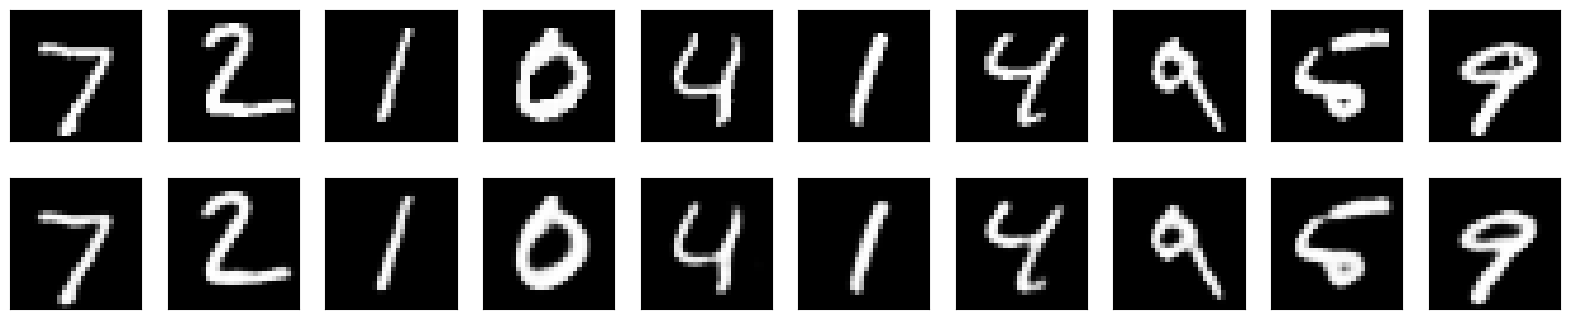

ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

In [4]:
# Load and preprocess the dataset (e.g., MNIST)
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape the data to match the expected input shape of the model
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Add random noise to the training data
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the values to ensure they are in the range [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# Define the input shape
input_shape = (28, 28, 1)

# Encoder
inputs = Input(shape=input_shape)
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv2)
encoded = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)

# Decoder
conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
up1 = UpSampling2D((2, 2))(conv3)
conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv4)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2)

# Define the autoencoder model
autoencoder = Model(inputs, decoded)

from tensorflow.keras.optimizers import Adam

# Compile the model
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train the model
epochs = 6
batch_size = 128
autoencoder.fit(x_train_noisy, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Evaluate the model on the test set
decoded_imgs = autoencoder.predict(x_test_noisy)

# Calculate the mean squared error
import tensorflow.keras.backend as K

mse = K.mean(K.square(x_test - decoded_imgs))
print('Mean Squared Error:', mse)

# Visualize the reconstructed images
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define the input shape
input_shape = (28, 28, 1)

# Define the autoencoder model
def create_autoencoder(learning_rate=0.001, loss='binary_crossentropy'):
    inputs = Input(shape=input_shape)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    pool1 = MaxPooling2D((2, 2), padding='same')(conv1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = MaxPooling2D((2, 2), padding='same')(conv2)
    encoded = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)

    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
    up1 = UpSampling2D((2, 2))(conv3)
    conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1)
    up2 = UpSampling2D((2, 2))(conv4)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2)

    autoencoder = Model(inputs, decoded)
    optimizer = Adam(learning_rate=learning_rate)
    autoencoder.compile(optimizer=optimizer, loss=loss)
    return autoencoder

# Create a KerasClassifier
autoencoder_clf = KerasClassifier(build_fn=create_autoencoder, verbose=0)

# Define the hyperparameters to tune
learning_rates = [0.001, 0.01, 0.1]
losses = ['binary_crossentropy', 'mean_squared_error']
param_grid = dict(learning_rate=learning_rates, loss=losses)

# Perform grid search
grid_search = GridSearchCV(estimator=autoencoder_clf, param_grid=param_grid, n_jobs=-1, cv=3)
grid_search = grid_search.fit(x_train_noisy, x_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_.model

# Evaluate the best model on the test set
decoded_imgs = best_model.predict(x_test_noisy)

# Calculate the mean squared error
import tensorflow.keras.backend as K

mse = K.mean(K.square(x_test - decoded_imgs))
print('Mean Squared Error:', mse)

# Visualize the reconstructed images
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [6]:
import tensorflow as tf
print(tf.__version__)


2.16.1
